In [1]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

In [3]:
# 去除数据中的最后一列，获得用于聚类的数据
def split_data(data):
    return data[:,0:-1]

def standard_data(data):
    print('data:{}'.format(data.shape))
    scaler = StandardScaler()
    np1 = scaler.fit_transform(data[:,0:2])
    np2 = data[:,2:4]
    np3 = scaler.fit_transform(data[:,4:])
    ans = np.hstack((np1,np2,np3))
    print('scale_data:{}'.format(ans.shape))
    return ans

In [4]:
# 加载数据
data = []
feature_method = ['CHI','IG','MI']
is_inter = ['False','True']
for f in feature_method:
    for inter in is_inter:
        data.append(np.load('./np_cluster_pro/np_{}_{}.npy'.format(f,inter)))

In [5]:
ori_cluster_data = data[5]
print('---ori_cluster_data:{}'.format(ori_cluster_data.shape))
cluster_data = split_data(ori_cluster_data)
cluster_data = standard_data(cluster_data)
model = KMeans(n_clusters=15,init='k-means++',max_iter=4000).fit(cluster_data)

---ori_cluster_data:(3205, 95)
data:(3205, 94)
scale_data:(3205, 94)


In [6]:
tsne = TSNE(perplexity=30, n_components=2, n_iter=5000)
low_dim = tsne.fit_transform(cluster_data)

In [7]:
ts = np.hstack((low_dim,model.labels_.reshape(-1,1)))

In [8]:
ts

array([[ 15.1600647 ,  19.93928719,   5.        ],
       [  9.35307789, -67.98114777,   5.        ],
       [  8.43964767, -66.87221527,   5.        ],
       ...,
       [-35.20154572, -51.16261673,   3.        ],
       [ 13.79061604,  48.1143074 ,   7.        ],
       [ 12.86013031, -31.4984436 ,   7.        ]])

In [9]:
ts_df = pd.DataFrame(ts)

In [10]:
ts_df.head()

,0,1,2
0,15.160065,19.939287,5.0
1,9.353078,-67.981148,5.0
2,8.439648,-66.872215,5.0
3,19.299755,50.710537,2.0
4,-39.220650,15.054906,7.0


In [11]:
print(low_dim)

[[ 15.160065  19.939287]
 [  9.353078 -67.98115 ]
 [  8.439648 -66.872215]
 ...
 [-35.201546 -51.162617]
 [ 13.790616  48.114307]
 [ 12.86013  -31.498444]]


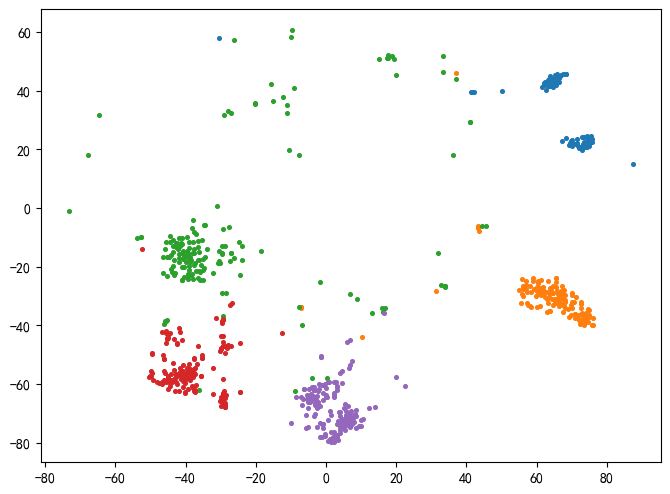

In [14]:
fig = plt.figure(figsize=(8,6),dpi=100)
alphas = [1,0.9,0.8,0.7,0.6]
for idx,c in enumerate(range(5)):
    tmp = ts_df[ts_df[2] == c]
    plt.scatter(tmp[0].values,tmp[1].values,s=7)

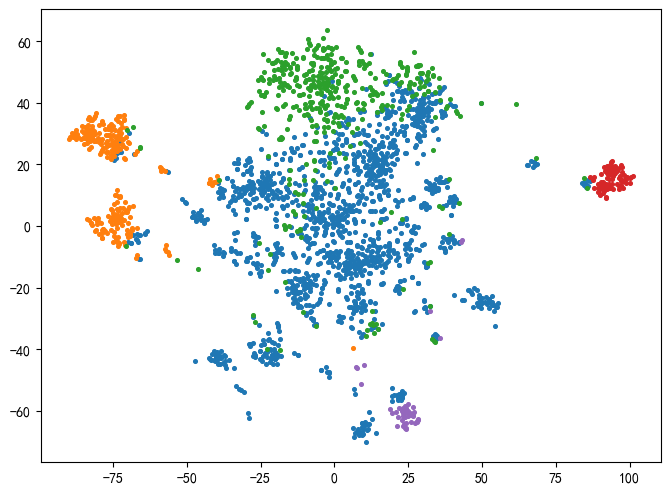

In [15]:
fig = plt.figure(figsize=(8,6),dpi=100)
for c in range(5,10):
    tmp = ts_df[ts_df[2] == c]
    plt.scatter(tmp[0].values,tmp[1].values,s=7)

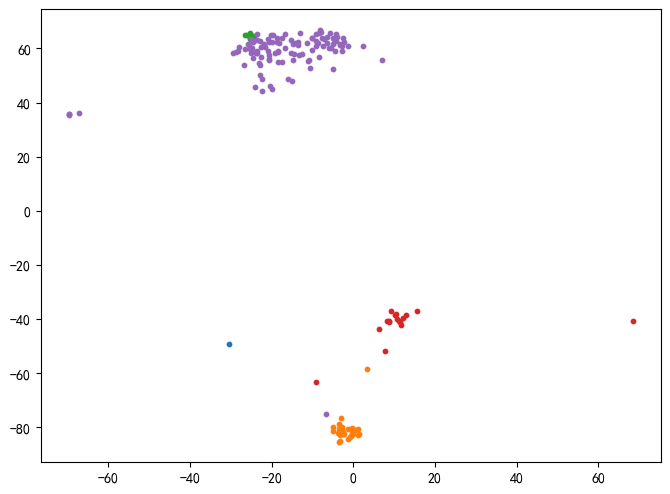

In [17]:
fig = plt.figure(figsize=(8,6),dpi=100)
for c in range(10,15):
    tmp = ts_df[ts_df[2] == c]
    plt.scatter(tmp[0].values,tmp[1].values,s=10)